In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

DATA_CONTAINER = "data/"

In [2]:
# loading data
def load_csv_data(file_name, data_container=DATA_CONTAINER):
    csv_path = os.path.join(data_container, file_name)
    return pd.read_csv(csv_path)

In [3]:
def plot_boxplox(data_time, data_temp, labels, title):
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
    
    bp = ax1.boxplot(data_time, labels=labels, notch=True, bootstrap=10000)
    ax1.set_ylabel('time to find all solutions (s)', color='b')
    ax1.tick_params('y', colors='b')
    
    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color='b')
    
    ax2 = ax2.twinx()
    bp = ax2.boxplot(data_temp, labels=labels, notch=True, bootstrap=10000)
    ax2.set_ylabel('temperature (°C)', color='r', )
    ax2.tick_params('y', colors='r')
  
    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color='r')
        
    plt.show()

In [4]:
def plot_data(timestamp, time, temp, limits, title):
    fig, ax1 = plt.subplots()

    maxtime = timestamp[-1:]

    ymin1 = limits[0]
    ymax1 = limits[1]
    ax1.plot(timestamp, time, 'b-')
    ax1.set_xlabel('experiment time (min) - (duration: %.2f min)' %(maxtime))
    ax1.set_ylabel('time to find all solutions (s)', color='b')
    ax1.tick_params('y', colors='b')
    ax1.set_ylim([ymin1, ymax1])

    ymin2 = limits[2]
    ymax2 = limits[3]
    ax2 = ax1.twinx()
    ax2.plot(timestamp, temp, 'r')
    ax2.set_ylabel('temperature (°C)', color='r')
    ax2.tick_params('y', colors='r')
    ax2.set_ylim([ymin2, ymax2])
    
    ax1.set_title(title)

    plt.show()

In [5]:
def plot_barh(y_pos, performance, error, labels, title, color, xlabel):
    fig, ax = plt.subplots()
    plt.grid()
    # Example data
    people = labels

    ax.barh(y_pos, performance, xerr=error, align='center',  color=color, ecolor='black', height=0.1)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(labels)
    ax.invert_yaxis() 
    ax.set_xlabel(xlabel)
    ax.set_title(title)
    plt.show()


In [6]:
def plot_barh(y_pos, performance, error, labels, title, color, xlabel):
    fig, ax = plt.subplots()
    plt.grid()
    # Example data
    people = labels

    ax.barh(y_pos, performance, xerr=error, align='center',  color=color, ecolor='black', height=0.1)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(labels)
    ax.invert_yaxis() 
    ax.set_xlabel(xlabel)
    ax.set_title(title)
    plt.show()


In [8]:
path_4b = "data/performance/raspberry_pi/buster/4B"

**Standard Raspbian Kernel with active ICE cooling**

In [9]:
# rPi 4B std - loading data standard raspbian kernel

#kernel_std_4b_mt_active = load_csv_data("std_kernel_4B_multithread_output_cooling.csv", path_4b)
#kernel_std_4b_mt_active = load_csv_data("std_kernel_4B_multithread_output_cooling_external_5v.csv", path_4b)
#kernel_std_4b_mt_active = load_csv_data("std_kernel_4B_multithread_output_cooling_capacitor_air.csv", path_4b)
#kernel_std_4b_mt_active = load_csv_data("std_kernel_4B_multithread_output_cooling_capacitor_ice_gel.csv", path_4b)
kernel_std_4b_mt_active = load_csv_data("std_kernel_4B_multithread_output_cooling_capacitor_firmware.csv", path_4b)
kernel_std_4b_mt_active['time'] -= kernel_std_4b_mt_active['time'][0]

kernel_std_4b_st_active = load_csv_data("std_kernel_4B_singlethread_output_cooling.csv", path_4b)
kernel_std_4b_st_active['time'] -= kernel_std_4b_st_active['time'][0]

**Standard Raspbian Kernel with passive ICE cooling**

In [10]:
# rPi 4B  - loading data preempt-rt raspbian kernel

kernel_std_4b_mt_passive = load_csv_data("std_kernel_4B_multithread_output_cooling_pasive.csv", path_4b)
kernel_std_4b_mt_passive['time'] -= kernel_std_4b_mt_passive['time'][0]

kernel_std_4b_st_passive = load_csv_data("std_kernel_4B_singlethread_output_cooling_passive.csv", path_4b)
kernel_std_4b_st_passive['time'] -= kernel_std_4b_st_passive['time'][0]

**Multithread - Standard Raspbian Kernel 4.19.80-v7l+**

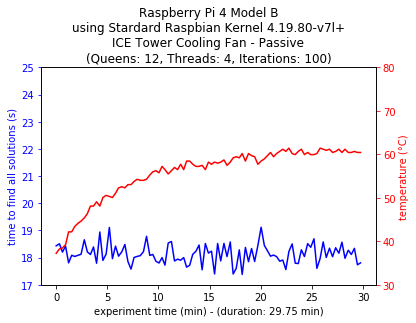

In [11]:
# rPi 4B MT - plotting standard raspbian kernel - passive cooling
timestamp_std_4b_mt_passive = kernel_std_4b_mt_passive.time/60
time_std_4b_mt_passive = kernel_std_4b_mt_passive.seconds + kernel_std_4b_mt_passive.microseconds/1000000
temp_std_4b_mt_passive = (kernel_std_4b_mt_passive.cpu_temp + kernel_std_4b_mt_passive.gpu_temp)/2
title = "Raspberry Pi 4 Model B\nusing Stardard Raspbian Kernel 4.19.80-v7l+\nICE Tower Cooling Fan - Passive\n(Queens: 12, Threads: 4, Iterations: 100)"

plot_data(timestamp_std_4b_mt_passive[:99], time_std_4b_mt_passive[:99], temp_std_4b_mt_passive[:99], (17, 25, 30, 80), title)

In [82]:
print("Time to 45 iterations: %.2f s" %timestamp_std_4b_mt_passive[44])

Time to 45 iterations: 13.35 s


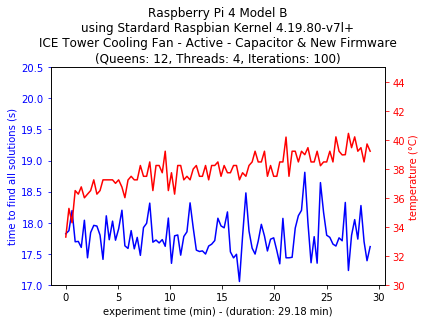

In [12]:
# rPi 4B MT - plotting standard raspbian kernel - active cooling
timestamp_std_4b_mt_active = kernel_std_4b_mt_active.time/60
time_std_4b_mt_active = kernel_std_4b_mt_active.seconds + kernel_std_4b_mt_active.microseconds/1000000
temp_std_4b_mt_active = (kernel_std_4b_mt_active.cpu_temp + kernel_std_4b_mt_active.gpu_temp)/2
#title = "Raspberry Pi 4 Model B\nusing Stardard Raspbian Kernel 4.19.80-v7l+\nICE Tower Cooling Fan - Active\n(Queens: 12, Threads: 4, Iterations: 100)"
#title = "Raspberry Pi 4 Model B\nusing Stardard Raspbian Kernel 4.19.80-v7l+\nICE Tower Cooling Fan - Active - Ext. 5V\n(Queens: 12, Threads: 4, Iterations: 100)"
#title = "Raspberry Pi 4 Model B\nusing Stardard Raspbian Kernel 4.19.80-v7l+\nICE Tower Cooling Fan - Active - Capacitor & Air blocked\n(Queens: 12, Threads: 4, Iterations: 100)"
#title = "Raspberry Pi 4 Model B\nusing Stardard Raspbian Kernel 4.19.80-v7l+\nICE Tower Cooling Fan - Active - Capacitor & Gel Pack\n(Queens: 12, Threads: 4, Iterations: 100)"
title = "Raspberry Pi 4 Model B\nusing Stardard Raspbian Kernel 4.19.80-v7l+\nICE Tower Cooling Fan - Active - Capacitor & New Firmware\n(Queens: 12, Threads: 4, Iterations: 100)"


#plot_data(timestamp_std_4b_mt_active[:99], time_std_4b_mt_active[:99], temp_std_4b_mt_active[:99], (17, 25, 30, 80), title)
plot_data(timestamp_std_4b_mt_active[:99], time_std_4b_mt_active[:99], temp_std_4b_mt_active[:99], (17, 20.5, 30, 45), title)

In [13]:
print("Time to 45 iterations: %.2f s" %timestamp_std_4b_mt_active[44])

Time to 45 iterations: 13.10 s


**Singple - Standard Raspbian Kernel 4.19.80-v7l+**

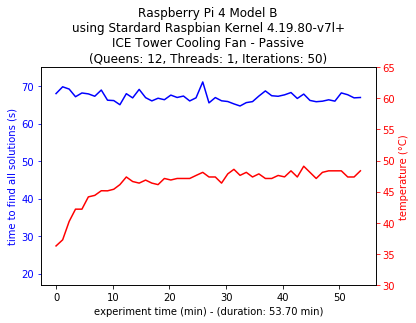

In [14]:
# rPi 4B ST - plotting standard raspbian kernel - passive cooling

timestamp_std_4b_st_passive = kernel_std_4b_st_passive.time/60
time_std_4b_st_passive = kernel_std_4b_st_passive.seconds + kernel_std_4b_st_passive.microseconds/1000000
temp_std_4b_st_passive = (kernel_std_4b_st_passive.cpu_temp + kernel_std_4b_st_passive.gpu_temp)/2
title = "Raspberry Pi 4 Model B\nusing Stardard Raspbian Kernel 4.19.80-v7l+\nICE Tower Cooling Fan - Passive\n(Queens: 12, Threads: 1, Iterations: 50)"
plot_data(timestamp_std_4b_st_passive[:49], time_std_4b_st_passive[:49], temp_std_4b_st_passive[:49], (17, 75, 30, 65 ), title)

In [15]:
print("Time to 45 iterations: %.2f s" %timestamp_std_4b_st_passive[44])

Time to 45 iterations: 49.20 s


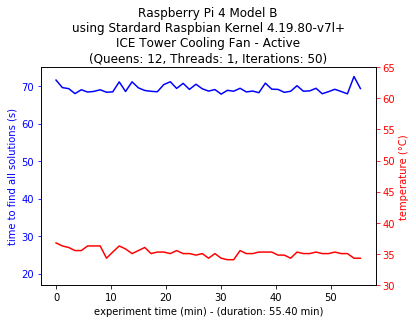

In [16]:
# rPi 4B ST - plotting standard raspbian kernel - active cooling

timestamp_std_4b_st_active = kernel_std_4b_st_active.time/60
time_std_4b_st_active = kernel_std_4b_st_active.seconds + kernel_std_4b_st_active.microseconds/1000000
temp_std_4b_st_active = (kernel_std_4b_st_active.cpu_temp + kernel_std_4b_st_active.gpu_temp)/2
title = "Raspberry Pi 4 Model B\nusing Stardard Raspbian Kernel 4.19.80-v7l+\nICE Tower Cooling Fan - Active\n(Queens: 12, Threads: 1, Iterations: 50)"
plot_data(timestamp_std_4b_st_active[:49], time_std_4b_st_active[:49], temp_std_4b_st_active[:49], (17, 75, 30, 65 ), title)

In [17]:
print("Time to 45 iterations: %.2f s" %timestamp_std_4b_st_active[44])

Time to 45 iterations: 50.75 s


In [18]:
print("Multi-thread 4B (A): %.2f | Multi-thread 4B (P): %.2f" % (np.mean(time_std_4b_mt_active), np.mean(time_std_4b_mt_passive)))
print("Single-thread 4B (A): %.2f | Single-thread 4B (P): %.2f" % (np.mean(time_std_4b_st_active), np.mean(time_std_4b_st_passive)))
print("Max. temp. (MT-A) %.2f | Max. temp. (MT-P) %.2f" % (np.max(temp_std_4b_mt_active), np.max(temp_std_4b_mt_passive)))
print("Max. temp. (ST-A) %.2f | Max. temp. (ST-P) %.2f" % (np.max(temp_std_4b_st_active), np.max(temp_std_4b_st_passive)))

Multi-thread 4B (A): 17.79 | Multi-thread 4B (P): 18.14
Single-thread 4B (A): 69.22 | Single-thread 4B (P): 67.14
Max. temp. (MT-A) 40.45 | Max. temp. (MT-P) 61.42
Max. temp. (ST-A) 36.74 | Max. temp. (ST-P) 49.09
